In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import YouTubeVideo
from functools import partial
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

In [5]:
df = pd.read_csv('helados.csv', index_col=0)

# 1. Ejercicio Práctico 

Para los datos de consumo de helados, encuentre los parámetros del **hiperplano** que ajuste mejor los datos 

$$
\text{consumo} = \theta_0 + \theta_1 \cdot \text{temperatura} + \theta_2 \cdot \text{precio}
$$

- Identifique y construya el vector $b$ y la matriz $A$ ¿Cuánto vale $N$ y $M$?
- ¿Es este un sistema cuadrado o rectangular? ¿ Es sobre o infra-determinado?
- Encuentre $\theta$ que minimiza la suma de errores cuadráticos
- Grafique el plano encontrado

### 1. 1 Identifique y construya el vector $b$ y la matriz $A$ ¿Cuánto vale $N$ y $M$?

In [6]:
N = len(df)
M = 3 # theta_0, theta_1 y theta_2

In [7]:
A = np.ones(shape=(N,M))
A[:,1] = df["temp"].values
A[:,2] = df["price"].values
b = df["cons"].values

### 1.2 ¿Es este un sistema cuadrado o rectangular? ¿ Es sobre o infra-determinado?

### 1.3 Encuentre $\theta$ que minimiza la suma de errores cuadráticos

In [8]:
theta = np.linalg.lstsq(A, b, rcond=None)[0]
print("theta_0 = ", "{:.3f}".format(theta[0]))
print("theta_1 = ", "{:.3f}".format(theta[1]))
print("theta_2 = ", "{:.3f}".format(theta[2]))

theta_0 =  0.597
theta_1 =  0.003
theta_2 =  -1.402


### 1.4 Grafique el plano encontrado

In [9]:
def x_plot(A, i):
    k = 10
    x_min = np.amin(A[:, i])
    x_max = np.amax(A[:, i])
    return np.linspace(x_min, x_max, num=k)

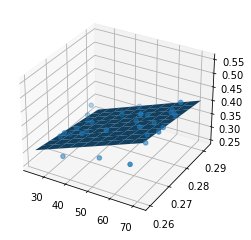

In [10]:
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d')
ax.scatter(A[:, 1], A[:, 2], b)
t_plot = x_plot(A, 1)
p_plot = x_plot(A, 2)
T_plot, P_plot = np.meshgrid(t_plot, p_plot)
ax.plot_surface(T_plot, P_plot, theta[0]+theta[1]*T_plot+theta[2]*P_plot);

# 2. Ejercicio Práctico

Considere los siguientes datos:

In [11]:
np.random.seed(1234)
x = np.linspace(0, 2, num=10)
y = 2*np.cos(2.0*np.pi*x) + np.sin(4.0*np.pi*x) + 0.4*np.random.randn(len(x))
x_plot = np.linspace(np.amin(x), np.amax(x), num=100)

- Realice una regresión polinomial sobre $(x, y)$ 
- Muestre graficamente los datos y el resultado de $f_\theta(x_{plot})$ 
- Use Jupyter widgets para modificar dinamicamente el grado del polinomio entre $M\in[1, 15]$

### 2.1 Realice una regresión polinomial sobre $(x, y)$ 

In [12]:
def calcPhi(x, grade):
    return np.vstack([x**j for j in range(grade+1)]).T

In [13]:
phi = calcPhi(x, 2)
theta = np.linalg.lstsq(phi, y, rcond=None)[0]

### 2.2 Muestre graficamente los datos y el resultado de $f_\theta(x_{plot})$ 

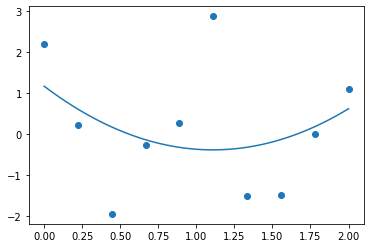

In [14]:
phi_theta = calcPhi(x_plot, 2)
f_theta = np.dot(phi_theta, theta)

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x_plot, f_theta)

### 2.3 Use Jupyter widgets para modificar dinamicamente el grado del polinomio entre $M\in[1, 15]$

In [15]:
def update_plot(grade):
    fig, ax = plt.subplots()
    ax.cla()
    theta = np.linalg.lstsq(calcPhi(x, grade), y, rcond=True)[0]
    ax.scatter(x, y)
    ax.plot(x_plot, np.dot(calcPhi(x_plot, grade), theta))

widgets.interact(update_plot, grade=widgets.IntSlider(min=1, max=15, value=1));

interactive(children=(IntSlider(value=1, description='grade', max=15, min=1), Output()), _dom_classes=('widget…

# 3. Ejercicio Práctico

Considere los siguientes datos

In [17]:
x = np.linspace(-5, 5, num=30)
x_plot = np.linspace(np.amin(x), np.amax(x), num=100)
y_clean = np.poly1d([0.1, -0.3, -2, 10]) 
np.random.seed(1234)
y = y_clean(x) + 1.5*np.random.randn(len(x))
poly_basis = lambda x, M : np.vstack([x**k for k in range(M)]).T

Considere el modelo de regresión polinomial

- Separé los datos $(x,y)$ aleatoriamente para crear conjuntos de entrenamiento y validación. Se recomienda usar la función `np.random.permutation` 
- Entrene con el conjunto de entrenamiento
- Encuentre el grado de polinomio que mejor ajusta los datos del conjunto de validación en base al error cuadrático medio:

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N e_i^2
$$

donde $e_i = y_i - f_\theta(x_i)$

### 3.1 Separé los datos $(x,y)$ aleatoriamente para crear conjuntos de entrenamiento y validación. Se recomienda usar la función `np.random.permutation` 

In [35]:
N = len(x)
P = np.random.permutation(N)

### 3.2 Entrene con el conjunto de entrenamiento

In [36]:
train_idx = P[:N//2]
valid_idx = P[N//2:]
M = 4
theta = np.linalg.lstsq(poly_basis(x[train_idx], M), y[train_idx], rcond=None)[0]

### 3.3 Encuentre el grado de polinomio que mejor ajusta los datos del conjunto de validación en base al error cuadrático medio

In [37]:
e = y[train_idx] - np.dot(poly_basis(x[train_idx], M), theta)
MSE = np.mean(e**2)

In [38]:
print("MSE = ", "{:.3f}".format(MSE))

MSE =  1.796
